In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split
import pandas as pd

pandas_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/final_dataset.csv")
# Define target and features
target_column = "price"  # Replace with your target column
X = pandas_df.drop(columns=[target_column])  # Features
y = pandas_df[target_column]  # Target variable


# Define categorical and numerical columns
categorical_columns = ["body_type", "fuel_type","has_accidents", "CAR_Make_Model"]
numerical_columns = ['horsepower', 'Age_of_vehicle', 'year', 'mileage']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),  # Scale numerical features
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)  # Encode categorical features
    ]
)

# Split data into Train+Validation (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Train+Validation Set: {len(X_train_val)} rows")
print(f"Testing Set (Unused): {len(X_test)} rows")

# N-Fold Cross-Validation on Train+Validation Set
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1 ,random_state=42)
}



for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    fold_rmse = []
    fold_r2 = []

    for train_index, val_index in kf.split(X_train_val):
        # Split the data into training and validation sets for this fold
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train the pipeline
        pipeline.fit(X_train, y_train)

        # Validate the model
        y_pred_val = pipeline.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred_val)
        r2 = r2_score(y_val, y_pred_val)

        fold_rmse.append(rmse)
        fold_r2.append(r2)

    # Report average and standard deviation of metrics across folds
    print(f"\n{model_name} Results with {n_folds}-Fold Cross-Validation:")
    print(f"Average RMSE: {sum(fold_rmse) / len(fold_rmse):.2f}")
    print(f"Standard Deviation of RMSE: {pd.Series(fold_rmse).std():.2f}")
    print(f"Average R² (Accuracy): {sum(fold_r2) / len(fold_r2):.2f}")
    print(f"Standard Deviation of R²: {pd.Series(fold_r2).std():.2f}")

    # Additional Parameter Reporting
    if model_name == "Random Forest":
        print(f"Number of Trees (n_estimators): {model.n_estimators}")
        print(f"Max Depth: {model.max_depth}")
    elif model_name == "Gradient Boosting":
        print(f"Learning Rate: {model.learning_rate}")
        print(f"Number of Trees (n_estimators): {model.n_estimators}")
        print(f"Max Depth: {model.max_depth}")

Train+Validation Set: 126279 rows
Testing Set (Unused): 31570 rows

Linear Regression Results with 5-Fold Cross-Validation:
Average RMSE: 10671.84
Standard Deviation of RMSE: 2376.10
Average R² (Accuracy): 0.70
Standard Deviation of R²: 0.11

Random Forest Results with 5-Fold Cross-Validation:
Average RMSE: 11536.55
Standard Deviation of RMSE: 2060.41
Average R² (Accuracy): 0.65
Standard Deviation of R²: 0.09
Number of Trees (n_estimators): 50
Max Depth: 5

Gradient Boosting Results with 5-Fold Cross-Validation:
Average RMSE: 10685.23
Standard Deviation of RMSE: 2396.08
Average R² (Accuracy): 0.69
Standard Deviation of R²: 0.11
Learning Rate: 0.1
Number of Trees (n_estimators): 100
Max Depth: 3


Base Code to initialize features for Different Models


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold, train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
# Load your dataset
pandas_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/final_dataset.csv")
# Step 1: Define target and features
target_column = "price"  # Replace with your target column
X = pandas_df.drop(columns=[target_column])  # Features
y = pandas_df[target_column]  # Target variable

# Define categorical and numerical columns
categorical_columns = ["body_type", "fuel_type", "has_accidents", "CAR_Make_Model"]
numerical_columns = ['horsepower', 'Age_of_vehicle', 'year', 'mileage']

# Step 2: Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),  # Scale numerical features
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)  # Encode categorical features
    ]
)

# Step 3: Split data into Train+Validation (80%) and Test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Train+Validation Set: {len(X_train_val)} rows")
print(f"Testing Set (Unused): {len(X_test)} rows")

# Step 4: Cross-validation setup
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)


Train+Validation Set: 126279 rows
Testing Set (Unused): 31570 rows


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import numpy as np


linear_results = []

linear_model = LinearRegression()

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", linear_model)
])

fold_rmse = []
fold_r2 = []

for train_index, val_index in kf.split(X_train_val):
    X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
    y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

    # Train and validate
    pipeline.fit(X_train, y_train)
    y_pred_val = pipeline.predict(X_val)

    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    r2 = r2_score(y_val, y_pred_val)

    fold_rmse.append(rmse)
    fold_r2.append(r2)

avg_rmse = np.mean(fold_rmse)
std_rmse = np.std(fold_rmse)
avg_r2 = np.mean(fold_r2)
std_r2 = np.std(fold_r2)

linear_results.append({
    "Model": "Linear Regression",
    "Avg RMSE": avg_rmse,
    "Std RMSE": std_rmse,
    "Avg R²": avg_r2,
    "Std R²": std_r2
})

# Display Results
linear_results_df = pd.DataFrame(linear_results)
print("\nLinear Regression Results:")
print(linear_results_df)



Linear Regression Results:
               Model      Avg RMSE     Std RMSE    Avg R²    Std R²
0  Linear Regression  10671.841377  2125.247288  0.696273  0.094654


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


ridge_configs = [Ridge(alpha=0.1), Ridge(alpha=1.0), Ridge(alpha=10.0)]
ridge_results = []

for ridge_model in ridge_configs:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", ridge_model)
    ])

    fold_rmse = []
    fold_r2 = []

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train and validate
        pipeline.fit(X_train, y_train)
        y_pred_val = pipeline.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        r2 = r2_score(y_val, y_pred_val)

        fold_rmse.append(rmse)
        fold_r2.append(r2)

    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_r2 = np.mean(fold_r2)
    std_r2 = np.std(fold_r2)

    ridge_results.append({
        "Model": "Ridge",
        "Alpha": ridge_model.alpha,
        "Avg RMSE": avg_rmse,
        "Std RMSE": std_rmse,
        "Avg R²": avg_r2,
        "Std R²": std_r2
    })

# Display Results
ridge_results_df = pd.DataFrame(ridge_results)
print("\nRidge Regression Results:")
print(ridge_results_df)



Ridge Regression Results:
   Model  Alpha      Avg RMSE     Std RMSE    Avg R²    Std R²
0  Ridge    0.1  10595.642351  2092.852621  0.700678  0.092533
1  Ridge    1.0  10551.556887  1919.020251  0.704005  0.081898
2  Ridge   10.0  11358.326338  1706.463436  0.658810  0.070073


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gb_configs = [
    GradientBoostingRegressor(learning_rate=0.05, n_estimators=25, random_state=42),
    GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, random_state=42),
    GradientBoostingRegressor(learning_rate=0.2, n_estimators=75, random_state=42),
    GradientBoostingRegressor(learning_rate=0.05, n_estimators=50, random_state=42),
    GradientBoostingRegressor(learning_rate=0.1, n_estimators=75, random_state=42),
    GradientBoostingRegressor(learning_rate=0.2, n_estimators=25, random_state=42),
    GradientBoostingRegressor(learning_rate=0.05, n_estimators=75, random_state=42),
    GradientBoostingRegressor(learning_rate=0.1, n_estimators=25, random_state=42),
    GradientBoostingRegressor(learning_rate=0.2, n_estimators=50, random_state=42),
    GradientBoostingRegressor(learning_rate=0.05, n_estimators=100, random_state=42),
    GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, random_state=42),
    GradientBoostingRegressor(learning_rate=0.2, n_estimators=100, random_state=42),
]
gb_results = []

for gb_model in gb_configs:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", gb_model)
    ])

    fold_rmse = []
    fold_r2 = []

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train and validate
        pipeline.fit(X_train, y_train)
        y_pred_val = pipeline.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        r2 = r2_score(y_val, y_pred_val)

        fold_rmse.append(rmse)
        fold_r2.append(r2)

    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_r2 = np.mean(fold_r2)
    std_r2 = np.std(fold_r2)

    gb_results.append({
        "Model": "Gradient Boosting",
        "Hyperparameters": gb_model.get_params(),
        "Avg RMSE": avg_rmse,
        "Std RMSE": std_rmse,
        "Avg R²": avg_r2,
        "Std R²": std_r2
    })

print("\nGradient Boosting Results:")
print(gb_results)



Gradient Boosting Results:
[{'Model': 'Gradient Boosting', 'Hyperparameters': {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}, 'Avg RMSE': 12972.39012886555, 'Std RMSE': 1523.0422752409359, 'Avg R²': 0.5557580268483179, 'Std R²': 0.06557538650666321}, {'Model': 'Gradient Boosting', 'Hyperparameters': {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf

In [ ]:
print("\nGradient Boosting Results:")
for result in gb_results:
    print(f"Model: {result['Model']}")
    print(f"Hyperparameters: {result['Hyperparameters']}")
    print(f"Average RMSE: {result['Avg RMSE']:.2f}")
    print(f"Standard Deviation of RMSE: {result['Std RMSE']:.2f}")
    print(f"Average R²: {result['Avg R²']:.4f}")
    print(f"Standard Deviation of R²: {result['Std R²']:.4f}")
    print("-" * 50)  # Separator for readability



Gradient Boosting Results:
Model: Gradient Boosting
Hyperparameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Average RMSE: 12972.39
Standard Deviation of RMSE: 1523.04
Average R²: 0.5558
Standard Deviation of R²: 0.0656
--------------------------------------------------
Model: Gradient Boosting
Hyperparameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_w

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gb_configs = [
    GradientBoostingRegressor(alpha=0.5,learning_rate=0.05, n_estimators=100, random_state=42),
    GradientBoostingRegressor(alpha=0.5,learning_rate=0.1, n_estimators=100, random_state=42),
    GradientBoostingRegressor(alpha=0.5,learning_rate=0.2, n_estimators=100, random_state=42),
]
gb_results = []

for gb_model in gb_configs:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", gb_model)
    ])

    fold_rmse = []
    fold_r2 = []

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train and validate
        pipeline.fit(X_train, y_train)
        y_pred_val = pipeline.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        r2 = r2_score(y_val, y_pred_val)

        fold_rmse.append(rmse)
        fold_r2.append(r2)

    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_r2 = np.mean(fold_r2)
    std_r2 = np.std(fold_r2)

    gb_results.append({
        "Model": "Gradient Boosting",
        "Hyperparameters": gb_model.get_params(),
        "Avg RMSE": avg_rmse,
        "Std RMSE": std_rmse,
        "Avg R²": avg_r2,
        "Std R²": std_r2
    })
print("\nGradient Boosting Results:")
for result in gb_results:
    print(f"Model: {result['Model']}")
    print(f"Hyperparameters: {result['Hyperparameters']}")
    print(f"Average RMSE: {result['Avg RMSE']:.2f}")
    print(f"Standard Deviation of RMSE: {result['Std RMSE']:.2f}")
    print(f"Average R²: {result['Avg R²']:.4f}")
    print(f"Standard Deviation of R²: {result['Std R²']:.4f}")
    print("-" * 50)



Gradient Boosting Results:
Model: Gradient Boosting
Hyperparameters: {'alpha': 0.5, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Average RMSE: 11008.75
Standard Deviation of RMSE: 1987.14
Average R²: 0.6772
Standard Deviation of R²: 0.0930
--------------------------------------------------
Model: Gradient Boosting
Hyperparameters: {'alpha': 0.5, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gb_configs = [
    GradientBoostingRegressor(alpha=0.1,learning_rate=0.05, n_estimators=100, random_state=42),
    GradientBoostingRegressor(alpha=0.1,learning_rate=0.1, n_estimators=100, random_state=42),
    GradientBoostingRegressor(alpha=0.1,learning_rate=0.2, n_estimators=100, random_state=42),
]
gb_results = []

for gb_model in gb_configs:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", gb_model)
    ])

    fold_rmse = []
    fold_r2 = []

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train and validate
        pipeline.fit(X_train, y_train)
        y_pred_val = pipeline.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        r2 = r2_score(y_val, y_pred_val)

        fold_rmse.append(rmse)
        fold_r2.append(r2)

    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_r2 = np.mean(fold_r2)
    std_r2 = np.std(fold_r2)

    gb_results.append({
        "Model": "Gradient Boosting",
        "Hyperparameters": gb_model.get_params(),
        "Avg RMSE": avg_rmse,
        "Std RMSE": std_rmse,
        "Avg R²": avg_r2,
        "Std R²": std_r2
    })
print("\nGradient Boosting Results:")
for result in gb_results:
    print(f"Model: {result['Model']}")
    print(f"Hyperparameters: {result['Hyperparameters']}")
    print(f"Average RMSE: {result['Avg RMSE']:.2f}")
    print(f"Standard Deviation of RMSE: {result['Std RMSE']:.2f}")
    print(f"Average R²: {result['Avg R²']:.4f}")
    print(f"Standard Deviation of R²: {result['Std R²']:.4f}")
    print("-" * 50)



Gradient Boosting Results:
Model: Gradient Boosting
Hyperparameters: {'alpha': 0.1, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Average RMSE: 11008.75
Standard Deviation of RMSE: 1987.14
Average R²: 0.6772
Standard Deviation of R²: 0.0930
--------------------------------------------------
Model: Gradient Boosting
Hyperparameters: {'alpha': 0.1, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gb_configs = [
    GradientBoostingRegressor(alpha=0.5,ccp_alpha=0.1,learning_rate=0.05, n_estimators=100, random_state=42),
    GradientBoostingRegressor(alpha=0.5,ccp_alpha=0.1,learning_rate=0.1, n_estimators=100, random_state=42),
    GradientBoostingRegressor(alpha=0.5,ccp_alpha=0.1,learning_rate=0.2, n_estimators=100, random_state=42),
]
gb_results = []

for gb_model in gb_configs:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", gb_model)
    ])

    fold_rmse = []
    fold_r2 = []

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train and validate
        pipeline.fit(X_train, y_train)
        y_pred_val = pipeline.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        r2 = r2_score(y_val, y_pred_val)

        fold_rmse.append(rmse)
        fold_r2.append(r2)

    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_r2 = np.mean(fold_r2)
    std_r2 = np.std(fold_r2)

    gb_results.append({
        "Model": "Gradient Boosting",
        "Hyperparameters": gb_model.get_params(),
        "Avg RMSE": avg_rmse,
        "Std RMSE": std_rmse,
        "Avg R²": avg_r2,
        "Std R²": std_r2
    })
print("\nGradient Boosting Results:")
for result in gb_results:
    print(f"Model: {result['Model']}")
    print(f"Hyperparameters: {result['Hyperparameters']}")
    print(f"Average RMSE: {result['Avg RMSE']:.2f}")
    print(f"Standard Deviation of RMSE: {result['Std RMSE']:.2f}")
    print(f"Average R²: {result['Avg R²']:.4f}")
    print(f"Standard Deviation of R²: {result['Std R²']:.4f}")
    print("-" * 50)



Gradient Boosting Results:
Model: Gradient Boosting
Hyperparameters: {'alpha': 0.5, 'ccp_alpha': 0.1, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Average RMSE: 11008.75
Standard Deviation of RMSE: 1987.14
Average R²: 0.6772
Standard Deviation of R²: 0.0930
--------------------------------------------------
Model: Gradient Boosting
Hyperparameters: {'alpha': 0.5, 'ccp_alpha': 0.1, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
gb_configs = [
    GradientBoostingRegressor(alpha=0.1,ccp_alpha=0.5,learning_rate=0.05, n_estimators=100, random_state=42),
    GradientBoostingRegressor(alpha=0.1,ccp_alpha=0.5,learning_rate=0.1, n_estimators=100, random_state=42),
    GradientBoostingRegressor(alpha=0.1,ccp_alpha=0.5,learning_rate=0.2, n_estimators=100, random_state=42),
]
gb_results = []

for gb_model in gb_configs:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", gb_model)
    ])

    fold_rmse = []
    fold_r2 = []

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train and validate
        pipeline.fit(X_train, y_train)
        y_pred_val = pipeline.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        r2 = r2_score(y_val, y_pred_val)

        fold_rmse.append(rmse)
        fold_r2.append(r2)

    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_r2 = np.mean(fold_r2)
    std_r2 = np.std(fold_r2)

    gb_results.append({
        "Model": "Gradient Boosting",
        "Hyperparameters": gb_model.get_params(),
        "Avg RMSE": avg_rmse,
        "Std RMSE": std_rmse,
        "Avg R²": avg_r2,
        "Std R²": std_r2
    })
print("\nGradient Boosting Results:")
for result in gb_results:
    print(f"Model: {result['Model']}")
    print(f"Hyperparameters: {result['Hyperparameters']}")
    print(f"Average RMSE: {result['Avg RMSE']:.2f}")
    print(f"Standard Deviation of RMSE: {result['Std RMSE']:.2f}")
    print(f"Average R²: {result['Avg R²']:.4f}")
    print(f"Standard Deviation of R²: {result['Std R²']:.4f}")
    print("-" * 50)



Gradient Boosting Results:
Model: Gradient Boosting
Hyperparameters: {'alpha': 0.1, 'ccp_alpha': 0.5, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Average RMSE: 11008.75
Standard Deviation of RMSE: 1987.14
Average R²: 0.6772
Standard Deviation of R²: 0.0930
--------------------------------------------------
Model: Gradient Boosting
Hyperparameters: {'alpha': 0.1, 'ccp_alpha': 0.5, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_configs = [
    RandomForestRegressor(n_estimators=25, max_depth=10, random_state=42),
    RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42),
    RandomForestRegressor(n_estimators=75, max_depth=10, random_state=42)
]
rf_results = []

for rf_model in rf_configs:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", rf_model)
    ])

    fold_rmse = []
    fold_r2 = []

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train and validate
        pipeline.fit(X_train, y_train)
        y_pred_val = pipeline.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        r2 = r2_score(y_val, y_pred_val)

        fold_rmse.append(rmse)
        fold_r2.append(r2)

    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_r2 = np.mean(fold_r2)
    std_r2 = np.std(fold_r2)

    rf_results.append({
        "Model": "Random Forest",
        "Hyperparameters": rf_model.get_params(),
        "Avg RMSE": avg_rmse,
        "Std RMSE": std_rmse,
        "Avg R²": avg_r2,
        "Std R²": std_r2
    })



In [ ]:
print("\nRandom Forest Results:")
for result in rf_results:
    print(f"Model: {result['Model']}")
    print(f"Hyperparameters: {result['Hyperparameters']}")
    print(f"Average RMSE: {result['Avg RMSE']:.2f}")
    print(f"Standard Deviation of RMSE: {result['Std RMSE']:.2f}")
    print(f"Average R²: {result['Avg R²']:.4f}")
    print(f"Standard Deviation of R²: {result['Std R²']:.4f}")
    print("-" * 50)


Random Forest Results:
Model: Random Forest
Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Average RMSE: 10243.05
Standard Deviation of RMSE: 2163.65
Average R²: 0.7189
Standard Deviation of R²: 0.0984
--------------------------------------------------
Model: Random Forest
Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'ra

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_configs = [
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
]
rf_results = []

for rf_model in rf_configs:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", rf_model)
    ])

    fold_rmse = []
    fold_r2 = []

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train and validate
        pipeline.fit(X_train, y_train)
        y_pred_val = pipeline.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        r2 = r2_score(y_val, y_pred_val)

        fold_rmse.append(rmse)
        fold_r2.append(r2)

    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_r2 = np.mean(fold_r2)
    std_r2 = np.std(fold_r2)

    rf_results.append({
        "Model": "Random Forest",
        "Hyperparameters": rf_model.get_params(),
        "Avg RMSE": avg_rmse,
        "Std RMSE": std_rmse,
        "Avg R²": avg_r2,
        "Std R²": std_r2
    })

print("\nRandom Forest Results:")
for result in rf_results:
    print(f"Model: {result['Model']}")
    print(f"Hyperparameters: {result['Hyperparameters']}")
    print(f"Average RMSE: {result['Avg RMSE']:.2f}")
    print(f"Standard Deviation of RMSE: {result['Std RMSE']:.2f}")
    print(f"Average R²: {result['Avg R²']:.4f}")
    print(f"Standard Deviation of R²: {result['Std R²']:.4f}")
    print("-" * 50)


Random Forest Results:
Model: Random Forest
Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Average RMSE: 10110.32
Standard Deviation of RMSE: 2153.17
Average R²: 0.7262
Standard Deviation of R²: 0.0951
--------------------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_configs = [
    RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
]
rf_results = []

for rf_model in rf_configs:
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", rf_model)
    ])

    fold_rmse = []
    fold_r2 = []

    for train_index, val_index in kf.split(X_train_val):
        X_train, X_val = X_train_val.iloc[train_index], X_train_val.iloc[val_index]
        y_train, y_val = y_train_val.iloc[train_index], y_train_val.iloc[val_index]

        # Train and validate
        pipeline.fit(X_train, y_train)
        y_pred_val = pipeline.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
        r2 = r2_score(y_val, y_pred_val)

        fold_rmse.append(rmse)
        fold_r2.append(r2)

    avg_rmse = np.mean(fold_rmse)
    std_rmse = np.std(fold_rmse)
    avg_r2 = np.mean(fold_r2)
    std_r2 = np.std(fold_r2)

    rf_results.append({
        "Model": "Random Forest",
        "Hyperparameters": rf_model.get_params(),
        "Avg RMSE": avg_rmse,
        "Std RMSE": std_rmse,
        "Avg R²": avg_r2,
        "Std R²": std_r2
    })

print("\nRandom Forest Results:")
for result in rf_results:
    print(f"Model: {result['Model']}")
    print(f"Hyperparameters: {result['Hyperparameters']}")
    print(f"Average RMSE: {result['Avg RMSE']:.2f}")
    print(f"Standard Deviation of RMSE: {result['Std RMSE']:.2f}")
    print(f"Average R²: {result['Avg R²']:.4f}")
    print(f"Standard Deviation of R²: {result['Std R²']:.4f}")
    print("-" * 50)


Random Forest Results:
Model: Random Forest
Hyperparameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Average RMSE: 9512.11
Standard Deviation of RMSE: 2327.71
Average R²: 0.7557
Standard Deviation of R²: 0.0989
--------------------------------------------------


Model: Linear Regression
Model: Ridge Regression
Model: Random Forest
Model: Gradient Boosting

Model Performance:
               Model  Train R²   Test R²     Test RMSE
0  Linear Regression  0.935488  0.921854  11935.307896
1   Ridge Regression  0.931064  0.921921  12023.956659
2      Random Forest  0.946070  0.918772  11487.067033
3  Gradient Boosting  0.883554  0.882237  13199.816273


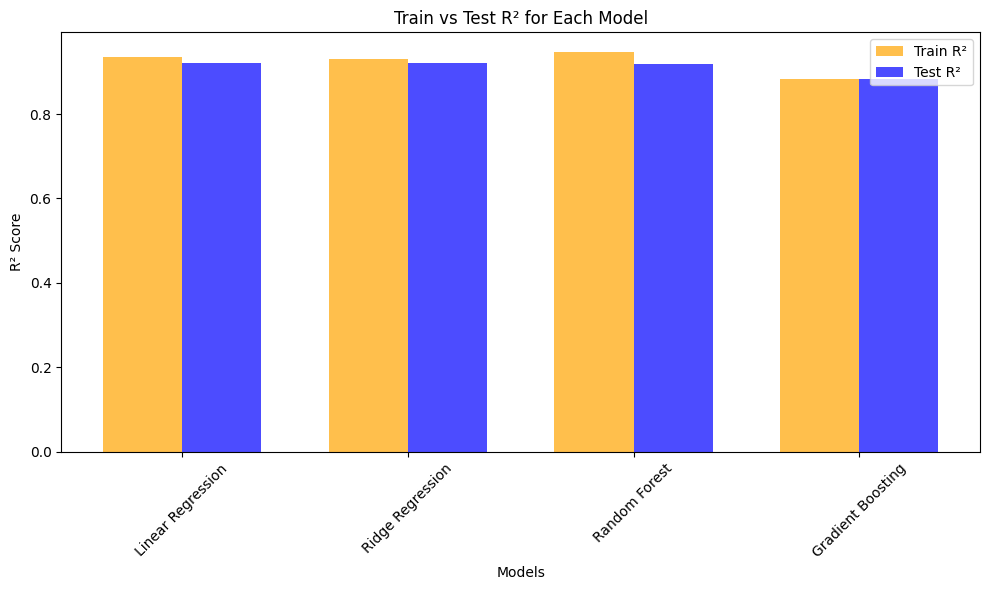

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load dataset (replace with your actual dataset path)
pandas_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/final_dataset.csv")

# Define target and features
target_column = "price"
X = pandas_df.drop(columns=[target_column])
y = pandas_df[target_column]

# Step 1: Transform the target variable (log-transform to handle extreme values)
y_log = np.log1p(y)

# Split data into train-validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Define preprocessing pipeline
categorical_columns = ["body_type", "fuel_type", "has_accidents", "CAR_Make_Model"]
numerical_columns = ["horsepower", "Age_of_vehicle", "year", "mileage"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

# Define models and hyperparameters
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
}

# Evaluate models
results = []
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    # Train the model on training+validation set
    pipeline.fit(X_train_val, y_train_val)

    # Evaluate on train and test sets
    y_train_pred = pipeline.predict(X_train_val)
    y_test_pred = pipeline.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train_val, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_test_pred)))
    print(f"Model: {model_name}")
    results.append({
        "Model": model_name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "Test RMSE": test_rmse
    })

# Display results
results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df)

results_df = pd.DataFrame(results)

# Extracting train and test R² values
train_r2 = results_df["Train R²"]
test_r2 = results_df["Test R²"]
models = results_df["Model"]

# Define positions for bars
x = np.arange(len(models))
width = 0.35

# Plot Train and Test R² side by side
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_r2, width, label="Train R²", color="orange", alpha=0.7)
plt.bar(x + width/2, test_r2, width, label="Test R²", color="blue", alpha=0.7)

# Add labels, title, and legend
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Train vs Test R² for Each Model")
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Model: Random Forest

Model Performance:
           Model  Train R²   Test R²     Test RMSE
0  Random Forest   0.94607  0.918772  11487.067033


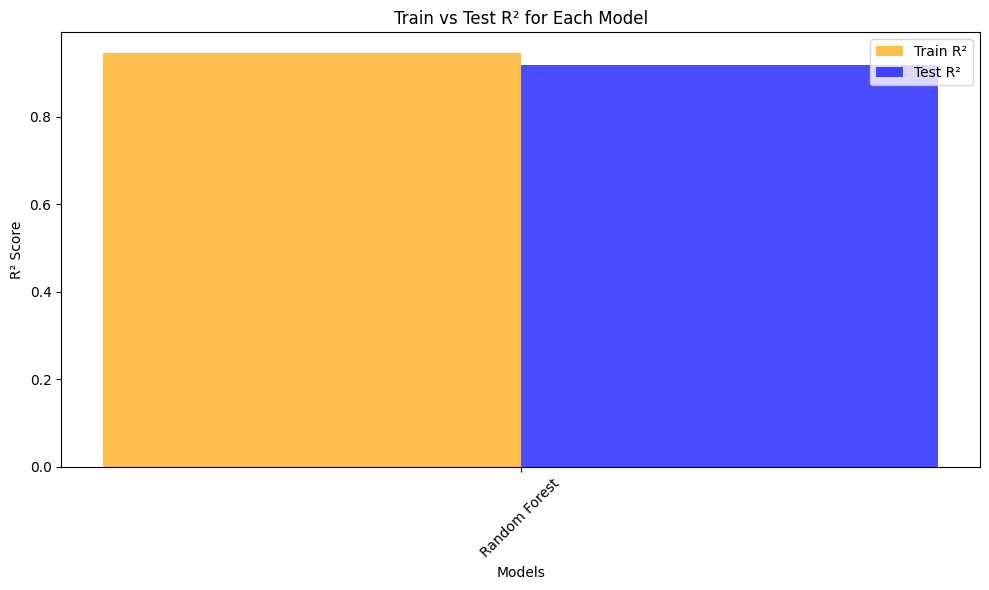

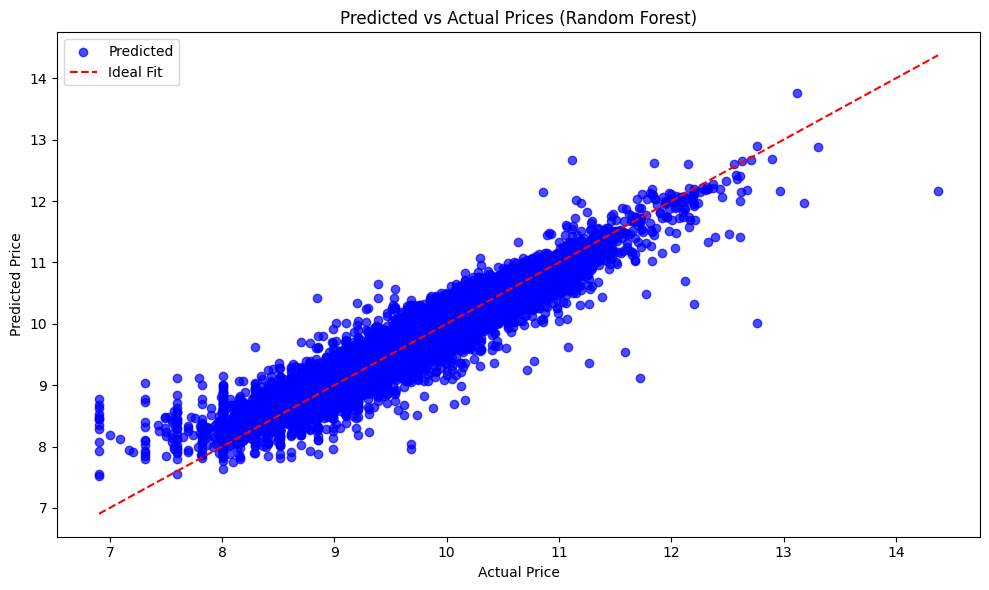

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load dataset (replace with your actual dataset path)
pandas_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/final_dataset.csv")

# Define target and features
target_column = "price"
X = pandas_df.drop(columns=[target_column])
y = pandas_df[target_column]

#Transform the target variable (log-transform to handle extreme values)
y_log = np.log1p(y)

# Split data into train-validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Define preprocessing pipeline
categorical_columns = ["body_type", "fuel_type", "has_accidents", "CAR_Make_Model"]
numerical_columns = ["horsepower", "Age_of_vehicle", "year", "mileage"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

# Define models and hyperparameters
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
}

# Evaluate models
results = []
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    # Train the model on training+validation set
    pipeline.fit(X_train_val, y_train_val)

    # Evaluate on train and test sets
    y_train_pred = pipeline.predict(X_train_val)
    y_test_pred = pipeline.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train_val, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_test_pred)))
    print(f"Model: {model_name}")
    results.append({
        "Model": model_name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "Test RMSE": test_rmse
    })

# Display results
results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df)

results_df = pd.DataFrame(results)

# Extracting train and test R² values
train_r2 = results_df["Train R²"]
test_r2 = results_df["Test R²"]
models = results_df["Model"]

# Define positions for bars
x = np.arange(len(models))
width = 0.35

# Plot Train and Test R² side by side
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_r2, width, label="Train R²", color="orange", alpha=0.7)
plt.bar(x + width/2, test_r2, width, label="Test R²", color="blue", alpha=0.7)

# Add labels, title, and legend
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Train vs Test R² for Each Model")
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Use simulated values for illustration
actual_values = y_test
predicted_values = pipeline.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.7, color="blue", label="Predicted")
plt.plot(
    [actual_values.min(), actual_values.max()],
    [actual_values.min(), actual_values.max()],
    color="red",
    linestyle="--",
    label="Ideal Fit"
)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices (Random Forest)")
plt.legend()
plt.tight_layout()
plt.show()

Model: Gradient Boosting

Model Performance:
               Model  Train R²   Test R²     Test RMSE
0  Gradient Boosting  0.883554  0.882237  13199.816273


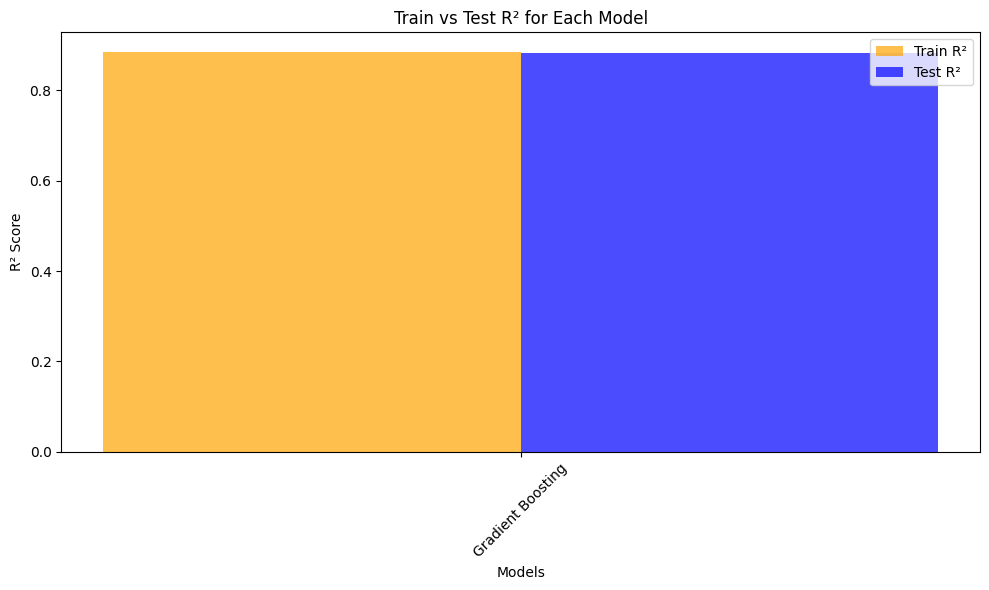

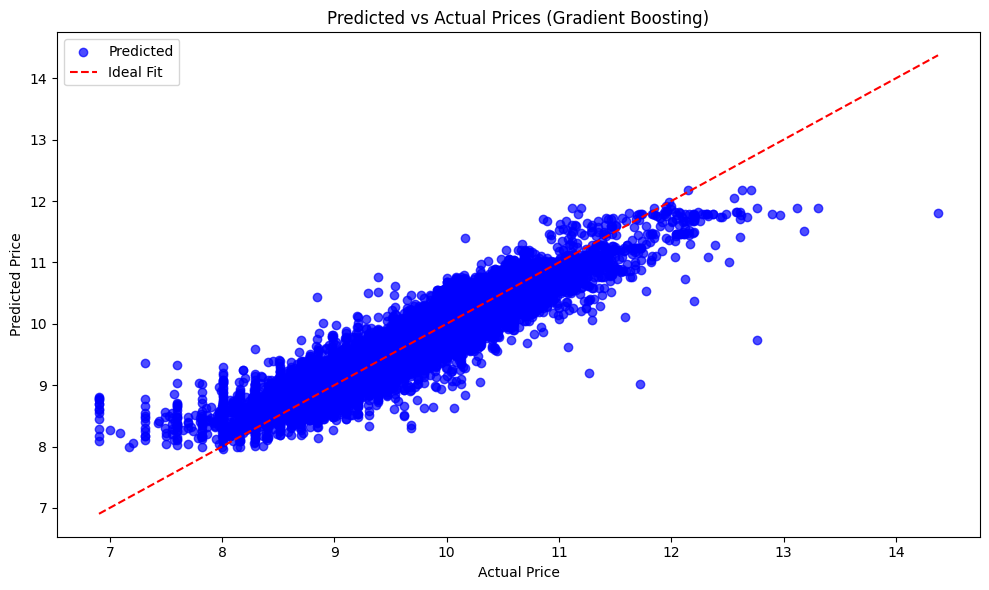

In [ ]:


import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load dataset (replace with your actual dataset path)
pandas_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/final_dataset.csv")

# Define target and features
target_column = "price"
X = pandas_df.drop(columns=[target_column])
y = pandas_df[target_column]

# Step 1: Transform the target variable (log-transform to handle extreme values)
y_log = np.log1p(y)

# Split data into train-validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Define preprocessing pipeline
categorical_columns = ["body_type", "fuel_type", "has_accidents", "CAR_Make_Model"]
numerical_columns = ["horsepower", "Age_of_vehicle", "year", "mileage"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

# Define models and hyperparameters
models = {
    "Gradient Boosting": GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
}

# Evaluate models
results = []
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    # Train the model on training+validation set
    pipeline.fit(X_train_val, y_train_val)

    # Evaluate on train and test sets
    y_train_pred = pipeline.predict(X_train_val)
    y_test_pred = pipeline.predict(X_test)

    # Calculate metrics
    train_r2 = r2_score(y_train_val, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_test_pred)))  # Convert log scale back
    print(f"Model: {model_name}")
    results.append({
        "Model": model_name,
        "Train R²": train_r2,
        "Test R²": test_r2,
        "Test RMSE": test_rmse
    })

# Display results
results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df)

results_df = pd.DataFrame(results)

# Extracting train and test R² values
train_r2 = results_df["Train R²"]
test_r2 = results_df["Test R²"]
models = results_df["Model"]

# Define positions for bars
x = np.arange(len(models))
width = 0.35

# Plot Train and Test R² side by side
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, train_r2, width, label="Train R²", color="orange", alpha=0.7)
plt.bar(x + width/2, test_r2, width, label="Test R²", color="blue", alpha=0.7)

# Add labels, title
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Train vs Test R² for Each Model")
plt.xticks(x, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Use simulated values for illustration
actual_values = y_test
predicted_values = pipeline.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, alpha=0.7, color="blue", label="Predicted")
plt.plot(
    [actual_values.min(), actual_values.max()],
    [actual_values.min(), actual_values.max()],
    color="red",
    linestyle="--",
    label="Ideal Fit"
)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Prices (Gradient Boosting)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(y_test_pred)

[10.4396656  10.48421347 10.21801933 ...  9.8298346   9.57587606
 10.24118445]


In [ ]:
print(y_test)

36203     10.682835
59628     10.669072
13575     11.090279
138930    10.012342
69792     10.186446
            ...    
142163     8.853094
95794      9.728062
24908      9.796904
7056       9.382275
65975     10.257589
Name: price, Length: 31570, dtype: float64


In [ ]:
arr=np.array(y_test)

In [ ]:
arr_test=np.array(y_test_pred)

In [ ]:
print(arr)

[10.68283536 10.66907167 11.09027859 ...  9.79690407  9.38227484
 10.25758919]


In [ ]:
print(arr_test)

[10.4396656  10.48421347 10.21801933 ...  9.8298346   9.57587606
 10.24118445]


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(arr, arr_test))
print(rmse)

0.22544478528848377


In [ ]:
y_actual = np.expm1(y_test)
y_pred = np.expm1(y_test_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(rmse)

13199.816273373008


In [ ]:
y_actual

,price
36203,43600.0
59628,43004.0
13575,65530.0
138930,22299.0
69792,26540.0
...,...
142163,6995.0
95794,16781.0
24908,17977.0
7056,11875.0
